# Random Forests

## Assignment


### About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
## Problem Statement:
1. A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [70]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [77]:
# Load dataset
data = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [76]:
# Describe the data
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [73]:
# Check for missing values
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [75]:
# Convert 'Sales' to categorical variable
data['Sales_Category'] = pd.cut(data['Sales'], bins=[0, 5, 10, 15, np.inf], labels=['Very Low', 'Low', 'Medium', 'High'])

In [61]:
# Select features and target variable
X = data.drop(['Sales', 'Sales_Category'], axis=1)
y = data['Sales_Category']

In [62]:
# Perform label encoding for the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [63]:
# Build Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train_encoded)

RandomForestRegressor(random_state=42)

In [64]:
# Evaluate model
y_pred = rf_model.predict(X_test_encoded)
print("R2 Score:", r2_score(y_test_encoded, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_encoded, y_pred)))

R2 Score: 0.10513308176100622
Root Mean Squared Error: 0.7455174377571594


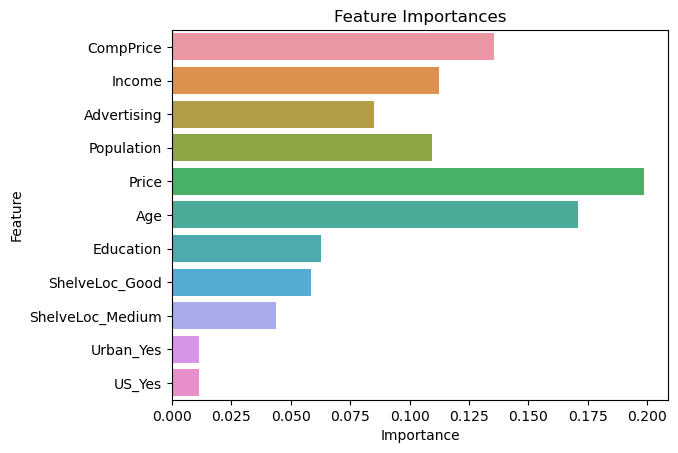

In [65]:
# Visualize feature importances
feature_importances = rf_model.feature_importances_
sns.barplot(x=feature_importances, y=X_encoded.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [67]:
# Convert Index object to list
feature_names = X_encoded.columns.tolist()

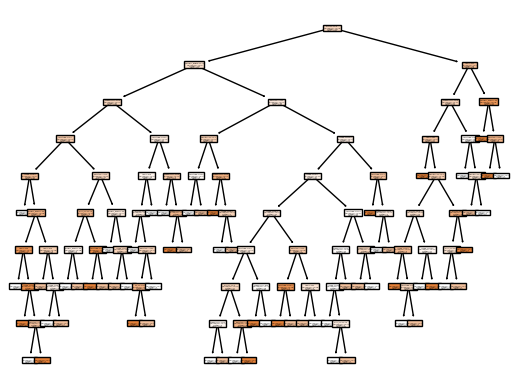

In [69]:
# Visualize a decision tree from the Random Forest
tree.plot_tree(rf_model.estimators_[0], feature_names=feature_names, filled=True)
plt.show()

### 2. Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [8]:
# Load dataset
data = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\Fraud_check.csv")

In [9]:
# Describe the data
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
# Check for missing values
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
# Define target variable
data['Risk'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [12]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [13]:
# Prepare features and target variable
X = data.drop(['Taxable.Income', 'City.Population', 'Risk'], axis=1)
y = data['Risk']

In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Evaluate model
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.76      0.86      0.81        94
       Risky       0.07      0.04      0.05        26

    accuracy                           0.68       120
   macro avg       0.42      0.45      0.43       120
weighted avg       0.61      0.68      0.65       120



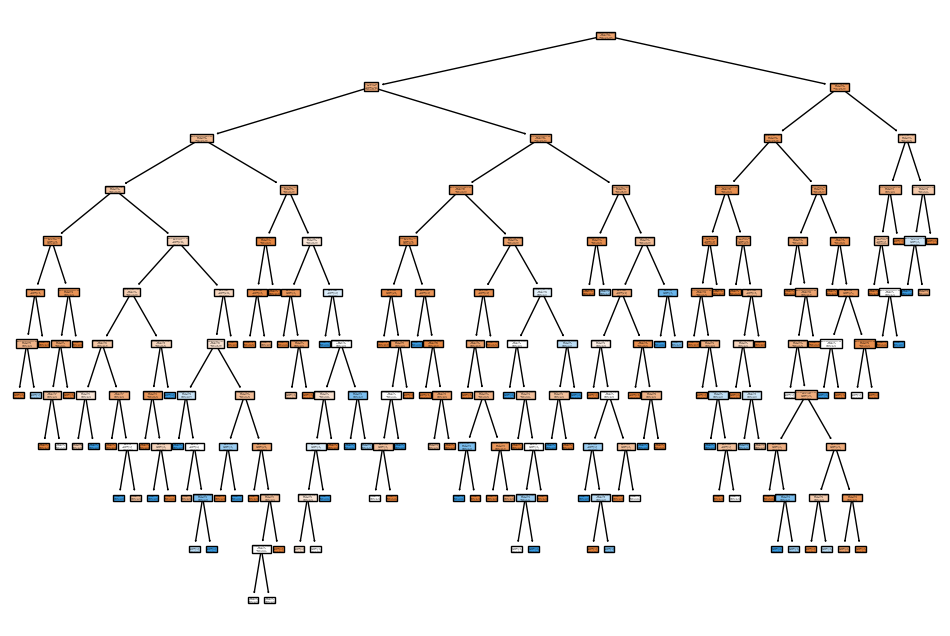

In [19]:
# Visualize the RF
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier.estimators_[0], feature_names=list(X.columns), filled=True, class_names=list(rf_classifier.classes_))
plt.show()